In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os,cv2

C:\Users\prath\anaconda3\envs\project\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\prath\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\prath\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
directory="DATA/train/"
classses=os.listdir(directory)

In [3]:
import os
import cv2
image_size=224
data1=[]#empty list
for category in classses:
    path = os.path.join(directory, category)
    print(path)
    label = classses.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        arr = cv2.imread(img_path)#Reading Images
        arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
        new_arr = cv2.resize(arr, (image_size, image_size))#Resizing into same shape
        data1.append([new_arr, label])

DATA/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
DATA/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
DATA/train/normal
DATA/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa


In [4]:
import random
random.shuffle(data1)

In [5]:
len(data1)

613

In [6]:
classses

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

In [7]:
x=[]#ndependent
y=[]#dependent
for features,labels in data1:
    x.append(features)
    y.append(labels)

In [8]:
x=np.array(x)
y=np.array(y)
x=x/255 #feature scaling

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [10]:
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential ,Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense ,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
model = Sequential()
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['accuracy'])

In [11]:
progess = model.fit(x=X_train,y=y_train,epochs=5,validation_data= (X_test, y_test))

Epoch 1/5
16/16 [==============================] - 333s 21s/step - loss: 1.2357 - accuracy: 0.4286 - val_loss: 1.0570 - val_accuracy: 0.4715
Epoch 2/5
16/16 [==============================] - 350s 22s/step - loss: 0.9632 - accuracy: 0.5551 - val_loss: 0.7681 - val_accuracy: 0.6585
Epoch 3/5
16/16 [==============================] - 1408s 88s/step - loss: 0.7052 - accuracy: 0.7000 - val_loss: 0.7130 - val_accuracy: 0.6992
Epoch 4/5
16/16 [==============================] - 312s 20s/step - loss: 0.5507 - accuracy: 0.7612 - val_loss: 0.6287 - val_accuracy: 0.7154
Epoch 5/5
16/16 [==============================] - 325s 20s/step - loss: 0.3645 - accuracy: 0.8633 - val_loss: 0.5793 - val_accuracy: 0.7480


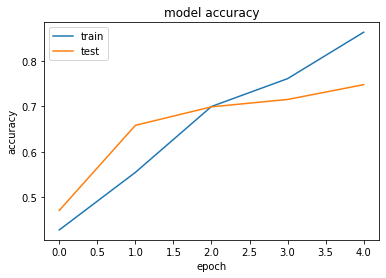

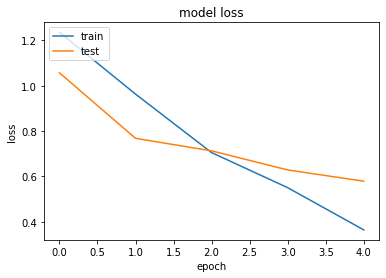

In [12]:
plt.plot(progess.history['accuracy'])
plt.plot(progess.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(progess.history['loss'])
plt.plot(progess.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

In [14]:
y_pred_new=[]
for i in y_pred:
    #print(i)
    #break
    y=np.argmax(i)
    #break
    #print(y)
    y_pred_new.append(y)
    #break

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_new, target_names=classses))

                                                  precision    recall  f1-score   support

      adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib       0.74      0.64      0.69        36
   large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa       0.51      1.00      0.68        24
                                          normal       1.00      0.88      0.94        26
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa       1.00      0.59      0.75        37

                                        accuracy                           0.75       123
                                       macro avg       0.81      0.78      0.76       123
                                    weighted avg       0.83      0.75      0.76       123



<AxesSubplot:>

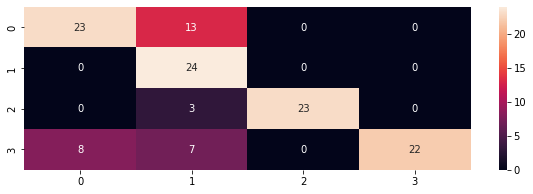

In [16]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred_new)
import pandas as pd
df_cm=pd.DataFrame(cm)
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(df_cm, annot=True)

In [20]:
base_model = applications.resnet.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model = Sequential()
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['accuracy'])

In [21]:
progess = model.fit(x=X_train,y=y_train,epochs=5,validation_data= (X_test, y_test))

Epoch 1/5
16/16 [==============================] - 266s 17s/step - loss: 1.4128 - accuracy: 0.5755 - val_loss: 1.9128 - val_accuracy: 0.1707
Epoch 2/5
16/16 [==============================] - 266s 17s/step - loss: 0.2568 - accuracy: 0.9041 - val_loss: 2.0808 - val_accuracy: 0.1951
Epoch 3/5
16/16 [==============================] - 310s 19s/step - loss: 0.0804 - accuracy: 0.9776 - val_loss: 1.7993 - val_accuracy: 0.1707
Epoch 4/5
16/16 [==============================] - 276s 17s/step - loss: 0.0808 - accuracy: 0.9816 - val_loss: 2.7310 - val_accuracy: 0.2114
Epoch 5/5
16/16 [==============================] - 267s 17s/step - loss: 0.0187 - accuracy: 0.9939 - val_loss: 2.9432 - val_accuracy: 0.2033


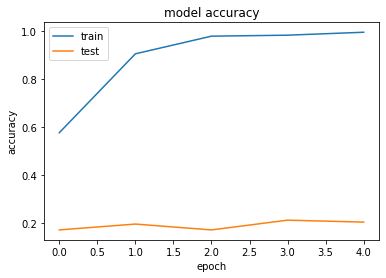

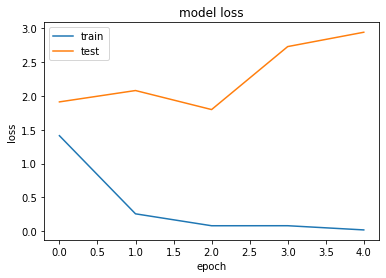

In [22]:
plt.plot(progess.history['accuracy'])
plt.plot(progess.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(progess.history['loss'])
plt.plot(progess.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

In [24]:
y_pred_new=[]
for i in y_pred:
    #print(i)
    #break
    y=np.argmax(i)
    #break
    #print(y)
    y_pred_new.append(y)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_new, target_names=classses))

                                                  precision    recall  f1-score   support

      adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib       0.00      0.00      0.00        36
   large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa       0.00      0.00      0.00        24
                                          normal       0.20      0.96      0.34        26
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa       0.00      0.00      0.00        37

                                        accuracy                           0.20       123
                                       macro avg       0.05      0.24      0.08       123
                                    weighted avg       0.04      0.20      0.07       123



C:\Users\prath\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prath\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prath\anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

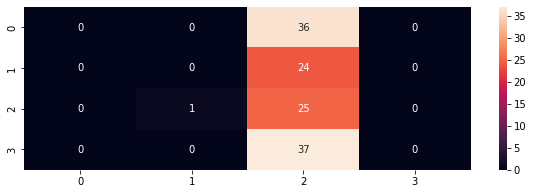

In [26]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred_new)
import pandas as pd
df_cm=pd.DataFrame(cm)
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(df_cm, annot=True)

In [35]:
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))
model = Sequential()
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['accuracy'])

In [36]:
progess = model.fit(x=X_train,y=y_train,epochs=5,validation_data= (X_test, y_test))

Epoch 1/5
16/16 [==============================] - 144s 9s/step - loss: 1.2216 - accuracy: 0.4918 - val_loss: 1.9134 - val_accuracy: 0.2683
Epoch 2/5
16/16 [==============================] - 135s 8s/step - loss: 0.5707 - accuracy: 0.7531 - val_loss: 1.2829 - val_accuracy: 0.5041
Epoch 3/5
16/16 [==============================] - 136s 8s/step - loss: 0.2321 - accuracy: 0.9184 - val_loss: 1.4514 - val_accuracy: 0.5691
Epoch 4/5
16/16 [==============================] - 135s 8s/step - loss: 0.0511 - accuracy: 0.9816 - val_loss: 1.5282 - val_accuracy: 0.6098
Epoch 5/5
16/16 [==============================] - 137s 9s/step - loss: 0.0281 - accuracy: 0.9918 - val_loss: 1.6267 - val_accuracy: 0.6504


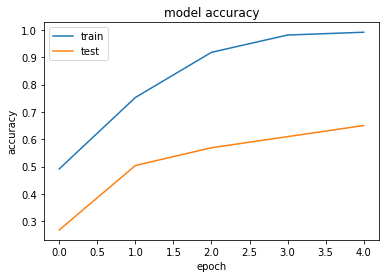

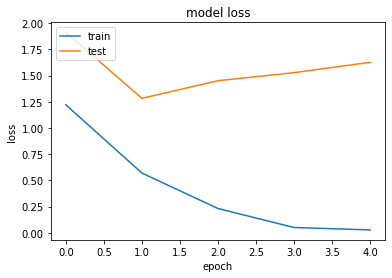

In [37]:
plt.plot(progess.history['accuracy'])
plt.plot(progess.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(progess.history['loss'])
plt.plot(progess.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

In [39]:
y_pred_new=[]
for i in y_pred:
    #print(i)
    #break
    y=np.argmax(i)
    #break
    #print(y)
    y_pred_new.append(y)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_new, target_names=classses))

                                                  precision    recall  f1-score   support

      adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib       0.47      0.92      0.62        36
   large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa       1.00      0.21      0.34        24
                                          normal       1.00      0.88      0.94        26
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa       0.76      0.51      0.61        37

                                        accuracy                           0.65       123
                                       macro avg       0.81      0.63      0.63       123
                                    weighted avg       0.77      0.65      0.63       123



<AxesSubplot:>

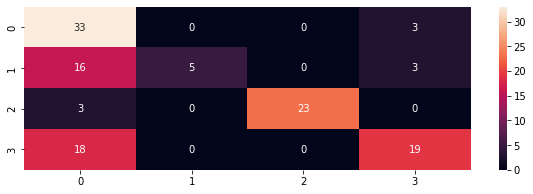

In [41]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred_new)
import pandas as pd
df_cm=pd.DataFrame(cm)
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(df_cm, annot=True)

In [28]:
base_model = applications.InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
model = Sequential()
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['accuracy'])

219062272/219055592 [==============================] - 30s 0us/step


In [29]:
progess = model.fit(x=X_train,y=y_train,epochs=5,validation_data= (X_test, y_test))

Epoch 1/5
16/16 [==============================] - 335s 21s/step - loss: 1.1265 - accuracy: 0.4755 - val_loss: 2.0398 - val_accuracy: 0.3659
Epoch 2/5
16/16 [==============================] - 282s 18s/step - loss: 0.4920 - accuracy: 0.7939 - val_loss: 1.4324 - val_accuracy: 0.5366
Epoch 3/5
16/16 [==============================] - 299s 19s/step - loss: 0.1749 - accuracy: 0.9531 - val_loss: 1.5250 - val_accuracy: 0.6260
Epoch 4/5
16/16 [==============================] - 290s 18s/step - loss: 0.0330 - accuracy: 0.9939 - val_loss: 2.1564 - val_accuracy: 0.5935
Epoch 5/5
16/16 [==============================] - 305s 19s/step - loss: 0.0240 - accuracy: 0.9898 - val_loss: 2.1076 - val_accuracy: 0.6179


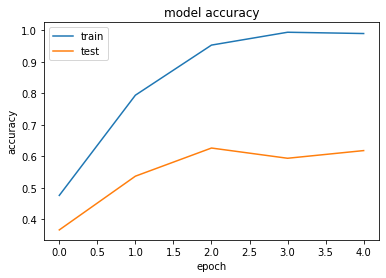

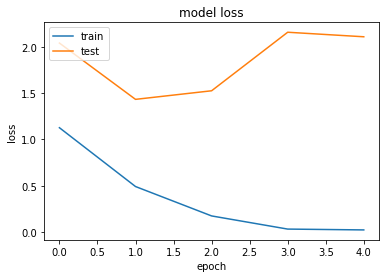

In [30]:
plt.plot(progess.history['accuracy'])
plt.plot(progess.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(progess.history['loss'])
plt.plot(progess.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

In [32]:
y_pred_new=[]
for i in y_pred:
    #print(i)
    #break
    y=np.argmax(i)
    #break
    #print(y)
    y_pred_new.append(y)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_new, target_names=classses))

                                                  precision    recall  f1-score   support

      adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib       0.44      1.00      0.62        36
   large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa       1.00      0.04      0.08        24
                                          normal       1.00      0.88      0.94        26
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa       0.89      0.43      0.58        37

                                        accuracy                           0.62       123
                                       macro avg       0.83      0.59      0.55       123
                                    weighted avg       0.80      0.62      0.57       123



<AxesSubplot:>

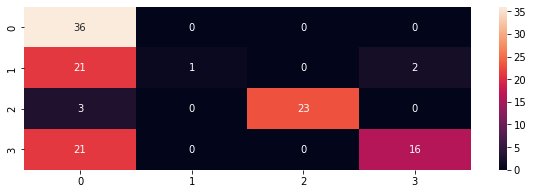

In [34]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred_new)
import pandas as pd
df_cm=pd.DataFrame(cm)
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(df_cm, annot=True)